In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'01': 1024}


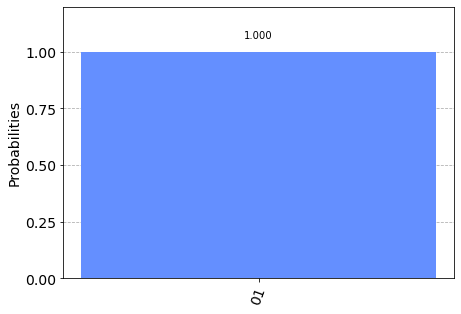

In [2]:
x = QuantumRegister(2)
f = QuantumRegister(3)
y = QuantumRegister(1)
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(x, f, y, c, name="deutsch-jozsa1")

# x  f(x) = x0*~x1 + x0*x1 = x0
# 00  0
# 01  0
# 10  1 
# 11  1 

# phi1 = |00>|0> + |01>|0> + |10>|0> + |11>|0>
# phin = |00>|0> + |01>|0> + |10>|1> + |11>|1>

# x
qc.h(x[0]) # |0> + |1>
qc.h(x[1]) # |0> + |1>
qc.x(y)
qc.h(y)    # |0> - |1>

# x0*~x1 -> f[0] = x[0] and ~x[1]
#qc.x(x[1])
#qc.ccx(x[0],x[1],f[0]) 

# x0*x1 -> f[1] = x[0] and x[1]
#qc.x(x[1]) # x[1] == ~(~x[1])
#qc.ccx(x[0],x[1],f[1])

# or gate
#qc.x(f[0])
#qc.x(f[1])
#qc.ccx(f[0],f[1],f[2]) 
#qc.x(f[0])
#qc.x(f[1])
#qc.x(f[2])

#qc.cx(f[2], y)

qc.cx(x[0], y) # y+f(x)

qc.h(x[0]) 
qc.h(x[1])

qc.measure(x[0], c[0])
qc.measure(x[1], c[1])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

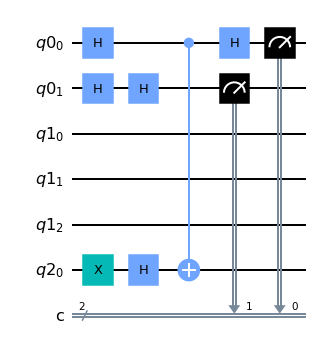

In [3]:
qc.draw(output='mpl')

In [4]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

Job Status: job has successfully run


In [7]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmqx2', backend_version='1.2.0', date=datetime.datetime(2019, 7, 2, 23, 31, 1, tzinfo=tzutc()), execution_id='6c3595c4-9d21-11e9-ac6e-9c5c8e96e1ef', header=Obj(backend_name='ibmqx2', backend_version='1.0.0'), job_id='unknown', qobj_id='5d1ec878-900e-4bde-8f48-f6648e70c6c8', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=495, 0x1=529)), header=Obj(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], memory_slots=1, n_qubits=5, name='truth_table1', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)


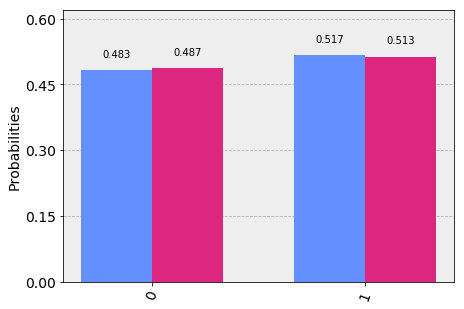

In [8]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [9]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 5d1be90c4837070074f43f00


In [ ]:
print(qc.qasm())